## Practical Work 3

For this practical work, the trainees will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that:
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

### Plot X vs. y

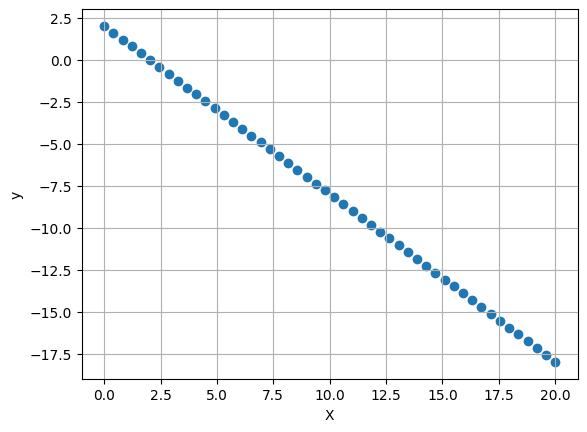

In [4]:
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.grid()
plt.show()

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [5]:
def LR_GD(X, y, learning_rate=0.001, max_iterations=1000, stop_criteria=0.001, cost_tolerance=0.001):
    theta_0 = 0
    theta_1 = 0
    m = len(y)

    theta_0_vals = []
    theta_1_vals = []
    cost_vals = []
    y_pred_vals = []

    for iteration in range(max_iterations):
        y_pred = theta_0 + theta_1 * X
        Error_Vector = y_pred - y

        cost = (1 / (2 * m)) * np.sum(Error_Vector ** 2)

        d_theta_0 = (1 / m) * np.sum(Error_Vector)
        d_theta_1 = (1 / m) * np.sum(Error_Vector * X)
        Gradient_Vector = np.array([d_theta_0, d_theta_1])
        Gradient_Vector_Norm = np.linalg.norm(Gradient_Vector)

        theta_0_vals.append(theta_0)
        theta_1_vals.append(theta_1)
        cost_vals.append(cost)
        y_pred_vals.append(y_pred)

        print(f"\n****************** Iteration {iteration} ********************\n")
        print(f"Predicted Values h(x):\n{y_pred}\n")
        print(f"Error Vector:\n{Error_Vector}\n")
        print(f"Cost (J): {cost:.6f}\n")
        print(f"Gradient Vector:\n{Gradient_Vector}\n")
        print(f"Gradient Vector Norm: {Gradient_Vector_Norm:.6f}\n")

        if iteration > 0:
            if (abs(cost_vals[-1] - cost_vals[-2]) < cost_tolerance) or ((Gradient_Vector_Norm < stop_criteria)):

                print("****************** Training Report ********************\n")
                print(f"Gradient Descent converged after {iteration+1} epochs\n")
                print(f"theta_0_Opt : {theta_0}")
                print(f"theta_1_Opt : {theta_1}\n")
                print(f"Error Vector:\n {Error_Vector}")
                print("\nCost =", cost, "\n")
                print(f"\nh(x) = y_predict: \n {y_pred}")
                print(f"\ny_actual : \n {y}\n")

                break

        theta_0 -= learning_rate * d_theta_0
        theta_1 -= learning_rate * d_theta_1


    return y_pred, cost_vals, theta_0_vals, theta_1_vals, y_pred_vals

In [6]:
def loss_vs_epochs(cost_vals):
  plt.figure(figsize=(7, 5))
  plt.scatter(x=range(len(cost_vals)), y=cost_vals)
  plt.plot(cost_vals)
  plt.xlabel('Iterations')
  plt.ylabel('Loss')
  plt.title('Loss vs. Iterations')
  plt.grid()
  plt.show()

def theta0_vs_loss(theta_0_vals, cost_vals):
  plt.figure(figsize=(7, 5))
  plt.scatter(x=theta_0_vals, y=cost_vals)
  plt.plot(theta_0_vals, cost_vals)
  plt.xlabel('Theta_0')
  plt.ylabel('Loss')
  plt.title('Theta_0 vs. Loss')
  plt.grid()
  plt.show()

def theta1_vs_loss(theta_1_vals, cost_vals):
  plt.figure(figsize=(7, 5))
  plt.scatter(x=theta_1_vals, y=cost_vals)
  plt.plot(theta_1_vals, cost_vals)
  plt.xlabel('Theta_1')
  plt.ylabel('Loss')
  plt.title('Theta_1 vs. Loss')
  plt.grid()
  plt.show()

def plot_all_regressions(X, y, y_pred_vals):
  plt.figure(figsize=(7, 5))
  plt.scatter(X, y)
  for y in y_pred_vals:
    plt.plot(X, y, color = 'r')
    plt.xlabel('X')
    plt.ylabel('y')
  plt.grid()
  plt.show()

def plot_best_regression(X, y, y_pred):
  plt.figure(figsize=(7, 5))
  plt.plot(X, y_pred, color = 'r')
  plt.xlabel('X')
  plt.ylabel('y')

  plt.scatter(X, y)
  plt.grid()
  plt.show()

In [7]:
y_pred, cost_vals, theta_0_vals, theta_1_vals, y_pred_vals = LR_GD(X, y, learning_rate=0.001, max_iterations=1000)


****************** Iteration 0 ********************

Predicted Values h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

Cost (J): 49.346939

Gradient Vector:
[  8.         114.69387755]

Gradient Vector Norm: 114.972543


****************** Iteration 1 ***********

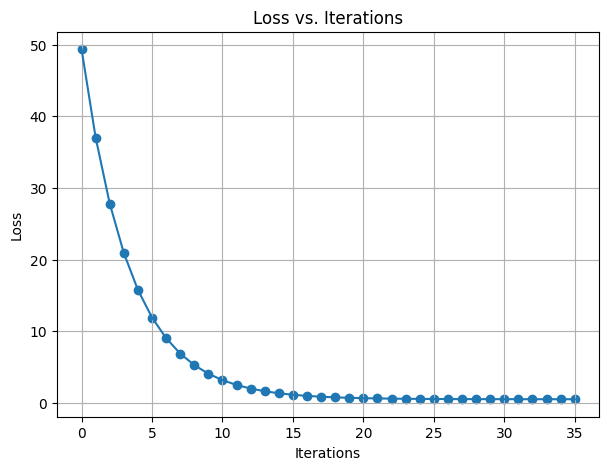

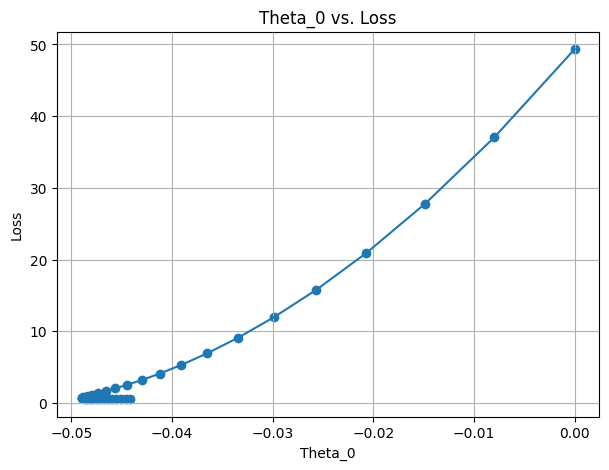

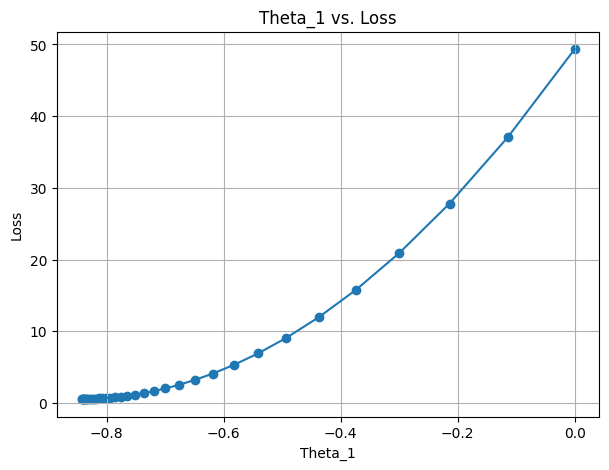

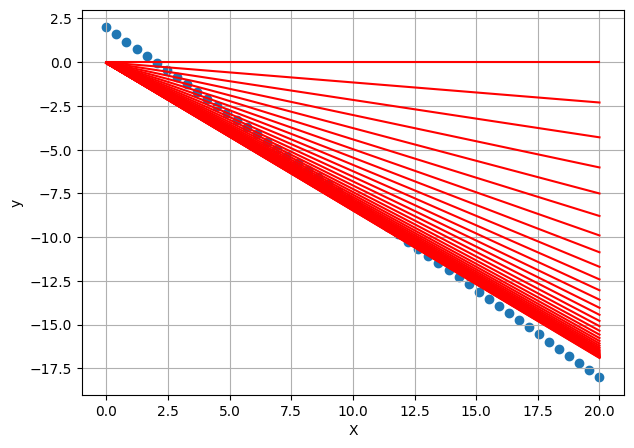

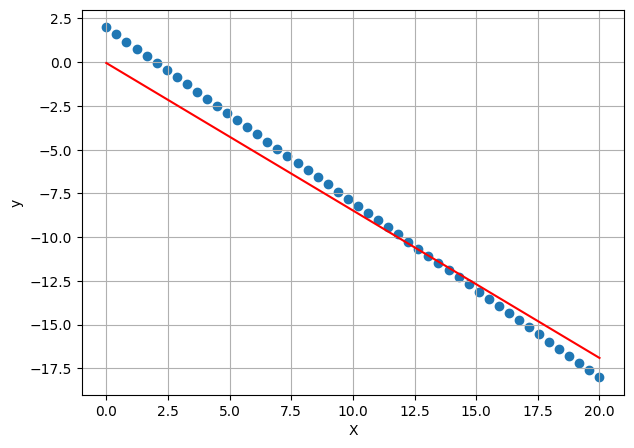

In [8]:
loss_vs_epochs(cost_vals)
theta0_vs_loss(theta_0_vals, cost_vals)
theta1_vs_loss(theta_1_vals, cost_vals)
plot_all_regressions(X, y, y_pred_vals)
plot_best_regression(X, y, y_pred)

In [9]:
from sklearn.metrics import r2_score
print(f"r2 score: {r2_score(y, y_pred)}")

r2 score: 0.9688589407729974


#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [10]:
y_pred2, cost_vals2, theta_0_vals2, theta_1_vals2, y_pred_vals2 = LR_GD(X, y, learning_rate=0.0005, max_iterations=300)


****************** Iteration 0 ********************

Predicted Values h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

Cost (J): 49.346939

Gradient Vector:
[  8.         114.69387755]

Gradient Vector Norm: 114.972543


****************** Iteration 1 ***********

In [11]:
print(f"r2 score: {r2_score(y, y_pred2)}")

r2 score: 0.9686158031920962


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

In [12]:
#Defined the functions in a previous cell

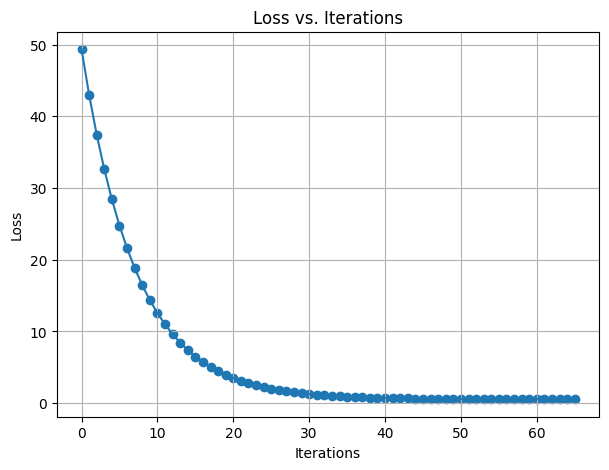

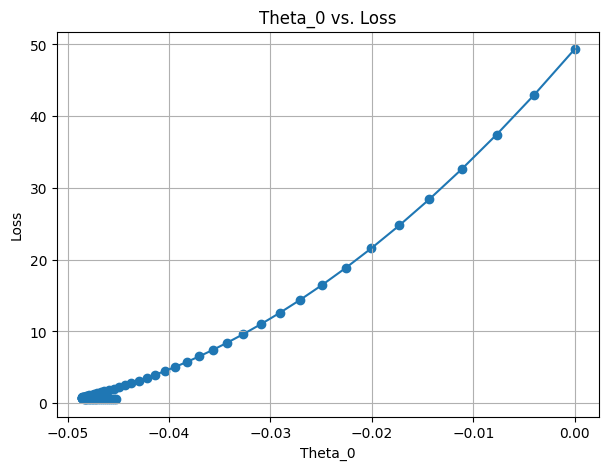

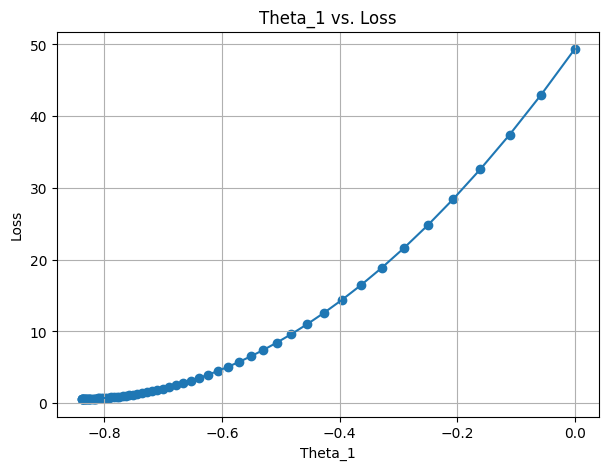

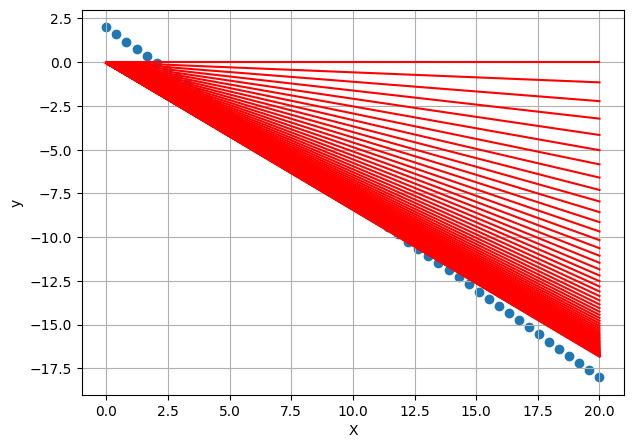

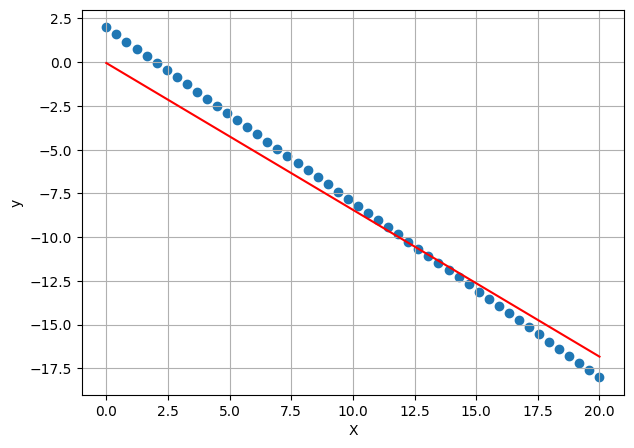

In [13]:
loss_vs_epochs(cost_vals2)
theta0_vs_loss(theta_0_vals2, cost_vals2)
theta1_vs_loss(theta_1_vals2, cost_vals2)
plot_all_regressions(X, y, y_pred_vals2)
plot_best_regression(X, y, y_pred2)

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [14]:
def LR_MGD(X, y, learning_rate=0.001, max_iterations=1000, stop_criteria=0.001, cost_tolerance=0.001, gamma = 0.9):
    theta_0 = 0
    theta_1 = 0
    m = len(y)
    v_0 = 0
    v_1 = 0

    theta_0_vals = []
    theta_1_vals = []
    cost_vals = []
    y_pred_vals = []

    for iteration in range(max_iterations):
        y_pred = theta_0 + theta_1 * X
        Error_Vector = y_pred - y

        cost = (1 / (2 * m)) * np.sum(Error_Vector ** 2)

        d_theta_0 = (1 / m) * np.sum(Error_Vector)
        d_theta_1 = (1 / m) * np.sum(Error_Vector * X)
        Gradient_Vector = np.array([d_theta_0, d_theta_1])
        Gradient_Vector_Norm = np.linalg.norm(Gradient_Vector)

        theta_0_vals.append(theta_0)
        theta_1_vals.append(theta_1)
        cost_vals.append(cost)
        y_pred_vals.append(y_pred)

        print(f"\n****************** Iteration {iteration} ********************\n")
        print(f"Predicted Values h(x):\n{y_pred}\n")
        print(f"Error Vector:\n{Error_Vector}\n")
        print(f"Cost (J): {cost:.6f}\n")
        print(f"Gradient Vector:\n{Gradient_Vector}\n")
        print(f"Gradient Vector Norm: {Gradient_Vector_Norm:.6f}\n")

        if iteration > 0:
            if (abs(cost_vals[-1] - cost_vals[-2]) < cost_tolerance) or ((Gradient_Vector_Norm < stop_criteria)):

                print("****************** Training Report ********************\n")
                print(f"Gradient Descent converged after {iteration+1} epochs\n")
                print(f"theta_0_Opt : {theta_0}")
                print(f"theta_1_Opt : {theta_1}\n")
                print(f"Error Vector:\n {Error_Vector}")
                print("\nCost =", cost, "\n")
                print(f"\nh(x) = y_predict: \n {y_pred}")
                print(f"\ny_actual : \n {y}\n")

                break

        v_0 = gamma * v_0 + learning_rate * d_theta_0
        v_1 = gamma * v_1 + learning_rate * d_theta_1

        theta_0 -= v_0
        theta_1 -= v_1


    print("****************** Training Report ********************\n")
    print(f"Gradient Descent converged after {iteration+1} epochs\n")
    print(f"theta_0_Opt : {theta_0}")
    print(f"theta_1_Opt : {theta_1}\n")
    print(f"Error Vector:\n {Error_Vector}")
    print("\nCost =", cost, "\n")
    print(f"\nh(x) = y_predict: \n {y_pred}")
    print(f"\ny_actual : \n {y}\n")

    return y_pred, cost_vals, theta_0_vals, theta_1_vals, y_pred_vals

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [15]:
y_predm1, cost_valsm1, theta_0_valsm1, theta_1_valsm1, y_pred_valsm1 = LR_MGD(X, y, learning_rate=0.0005, max_iterations=300, gamma = 0.5)


****************** Iteration 0 ********************

Predicted Values h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

Cost (J): 49.346939

Gradient Vector:
[  8.         114.69387755]

Gradient Vector Norm: 114.972543


****************** Iteration 1 ***********

In [16]:
print(f"r2 score: {r2_score(y, y_predm1)}")

r2 score: 0.9687892837396442


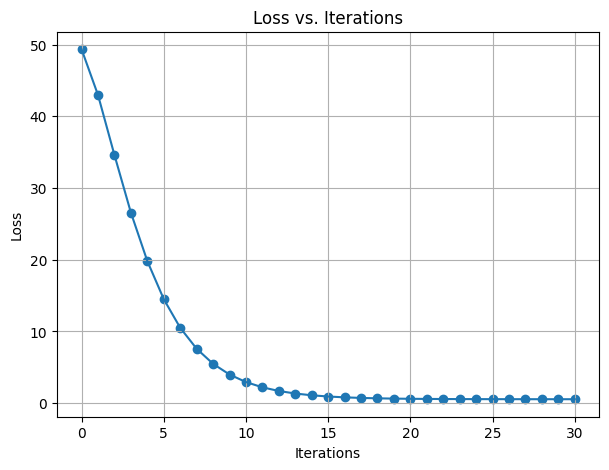

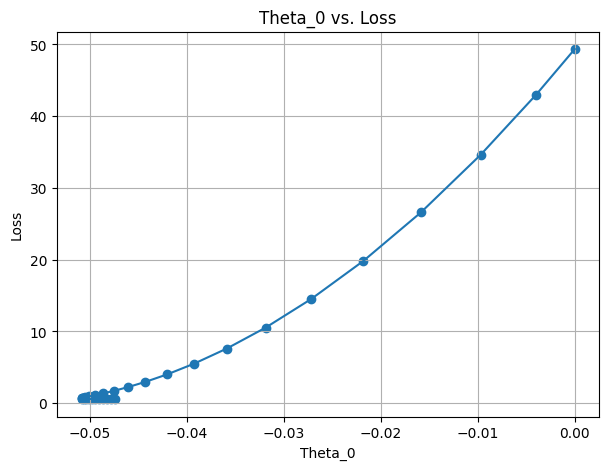

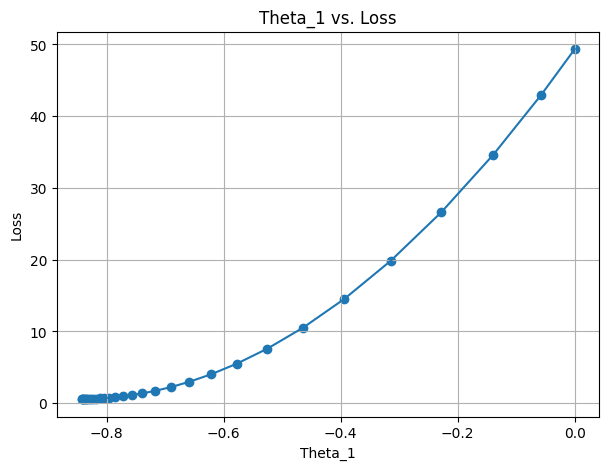

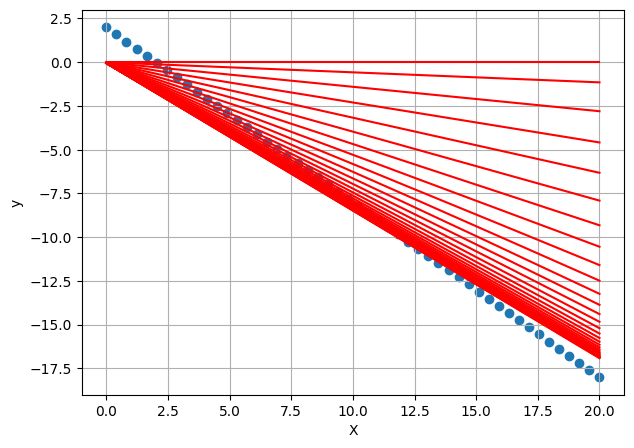

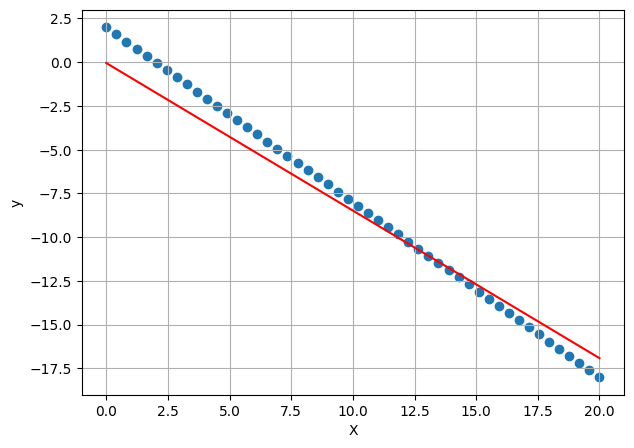

In [17]:
loss_vs_epochs(cost_valsm1)
theta0_vs_loss(theta_0_valsm1, cost_valsm1)
theta1_vs_loss(theta_1_valsm1, cost_valsm1)
plot_all_regressions(X, y, y_pred_valsm1)
plot_best_regression(X, y, y_predm1)

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero.
#### Try momentum = 0

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [18]:
y_predm2, cost_valsm2, theta_0_valsm2, theta_1_valsm2, y_pred_valsm2 = LR_MGD(X, y, learning_rate=0.0005, max_iterations=300, gamma = 0)


****************** Iteration 0 ********************

Predicted Values h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

Cost (J): 49.346939

Gradient Vector:
[  8.         114.69387755]

Gradient Vector Norm: 114.972543


****************** Iteration 1 ***********

In [19]:
print(f"r2 score: {r2_score(y, y_predm2)}")

r2 score: 0.9686158031920962


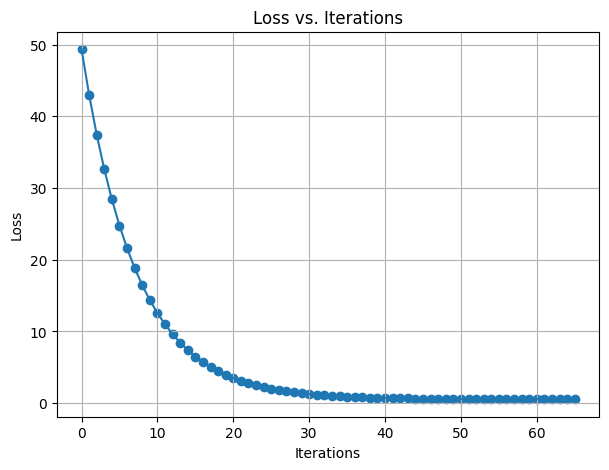

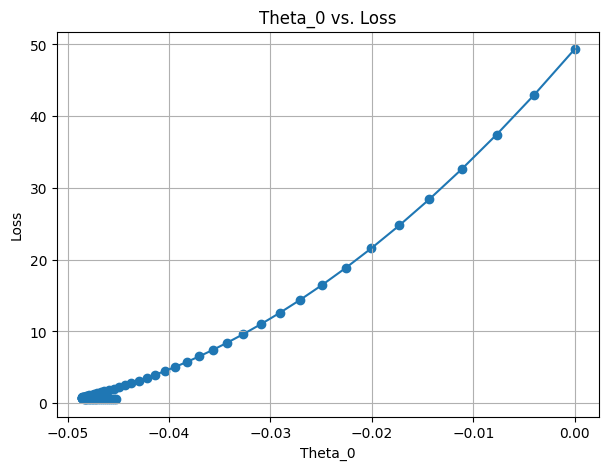

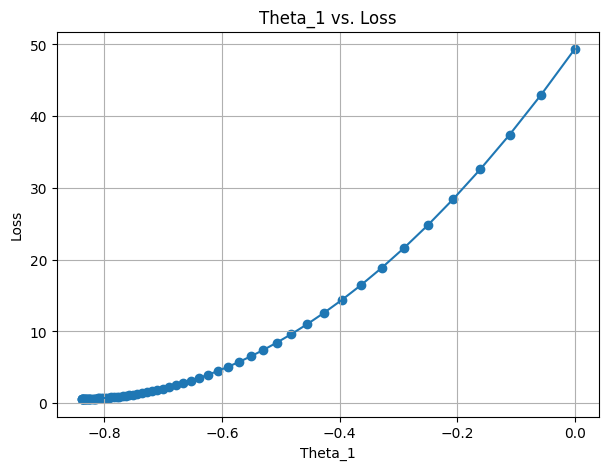

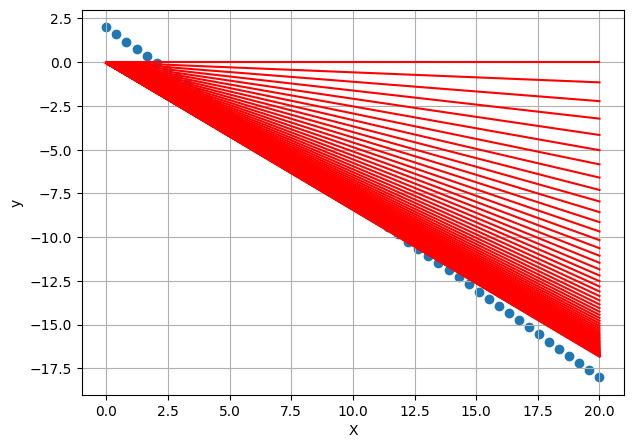

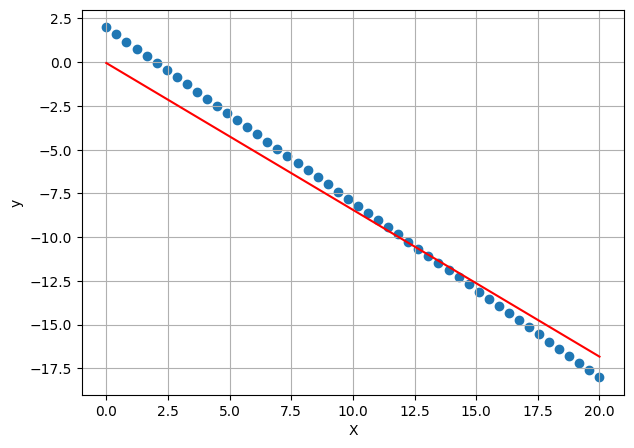

In [20]:
loss_vs_epochs(cost_valsm2)
theta0_vs_loss(theta_0_valsm2, cost_valsm2)
theta1_vs_loss(theta_1_valsm2, cost_valsm2)
plot_all_regressions(X, y, y_pred_valsm2)
plot_best_regression(X, y, y_predm2)

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [21]:
y_predm3, cost_valsm3, theta_0_valsm3, theta_1_valsm3, y_pred_valsm3 = LR_MGD(X, y, learning_rate=0.0005, max_iterations=300, gamma = 0.89)


****************** Iteration 0 ********************

Predicted Values h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

Cost (J): 49.346939

Gradient Vector:
[  8.         114.69387755]

Gradient Vector Norm: 114.972543


****************** Iteration 1 ***********

r2 score: 0.972435565060376


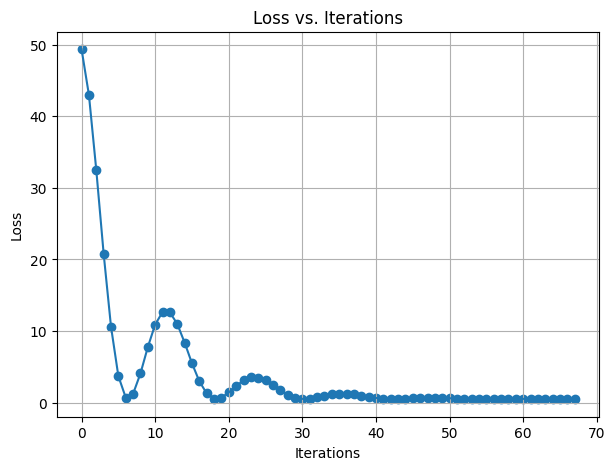

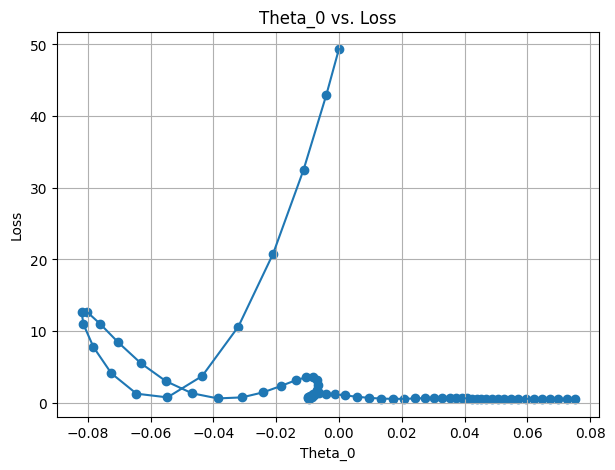

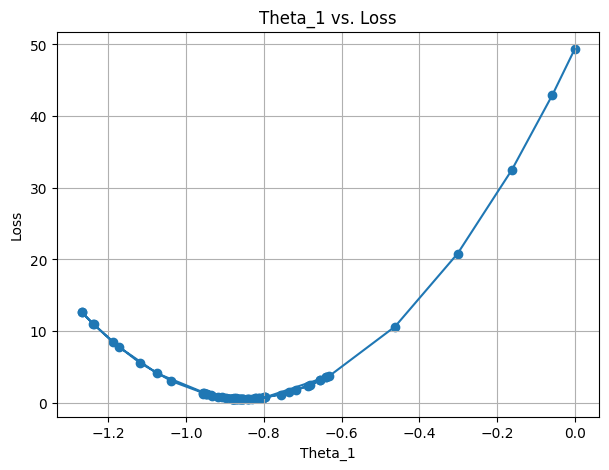

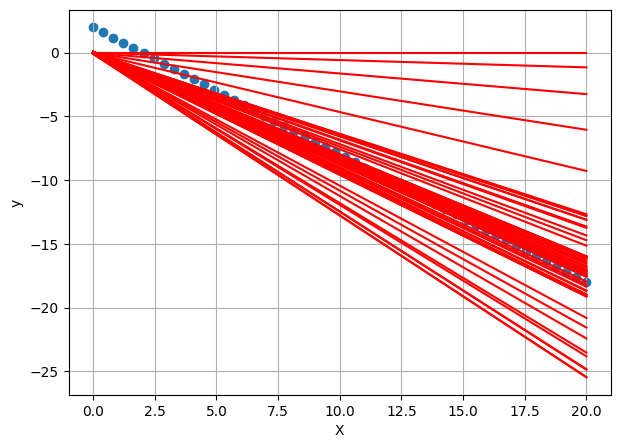

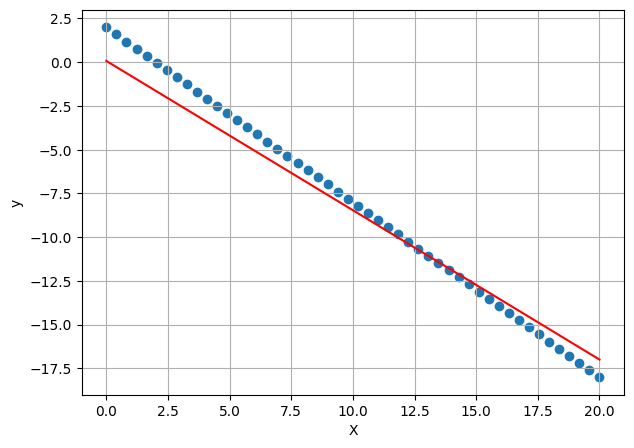

In [22]:
print(f"r2 score: {r2_score(y, y_predm3)}")
loss_vs_epochs(cost_valsm3)
theta0_vs_loss(theta_0_valsm3, cost_valsm3)
theta1_vs_loss(theta_1_valsm3, cost_valsm3)
plot_all_regressions(X, y, y_pred_valsm3)
plot_best_regression(X, y, y_predm3)

####Moment = 0.99 (close to 1)

In [23]:
y_predm4, cost_valsm4, theta_0_valsm4, theta_1_valsm4, y_pred_valsm4 = LR_MGD(X, y, learning_rate=0.0005, max_iterations=300, gamma = 0.99)

Streaming output truncated to the last 5000 lines.
[ -1.47055389 -18.02316594]

Gradient Vector Norm: 18.083059


****************** Iteration 152 ********************

Predicted Values h(x):
[  1.49105077   1.0061116    0.52117243   0.03623326  -0.44870591
  -0.93364508  -1.41858425  -1.90352342  -2.38846259  -2.87340176
  -3.35834093  -3.8432801   -4.32821927  -4.81315844  -5.29809761
  -5.78303679  -6.26797596  -6.75291513  -7.2378543   -7.72279347
  -8.20773264  -8.69267181  -9.17761098  -9.66255015 -10.14748932
 -10.63242849 -11.11736766 -11.60230683 -12.087246   -12.57218517
 -13.05712434 -13.54206351 -14.02700268 -14.51194185 -14.99688103
 -15.4818202  -15.96675937 -16.45169854 -16.93663771 -17.42157688
 -17.90651605 -18.39145522 -18.87639439 -19.36133356 -19.84627273
 -20.3312119  -20.81615107 -21.30109024 -21.78602941 -22.27096858]

Error Vector:
[-0.50894923 -0.58572513 -0.66250104 -0.73927694 -0.81605285 -0.89282875
 -0.96960466 -1.04638056 -1.12315647 -1.19993237 -1.2767082

In [24]:
print(f"r2 score: {r2_score(y, y_predm4)}")


r2 score: 0.8639612307607387


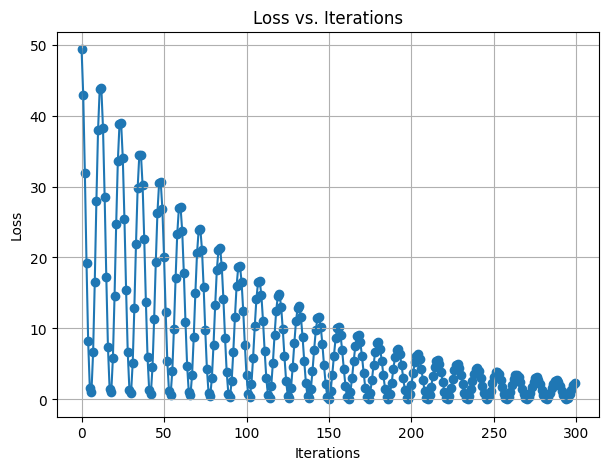

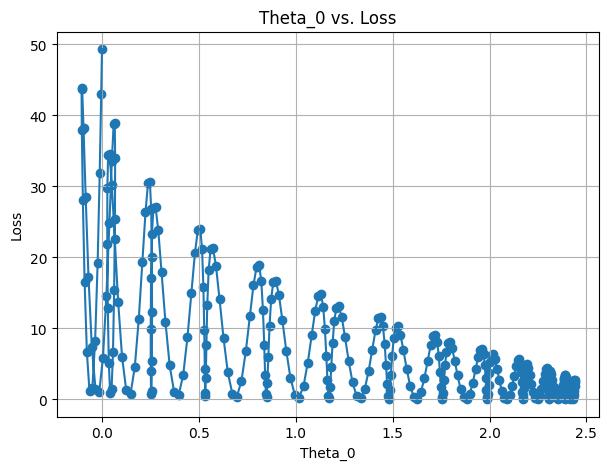

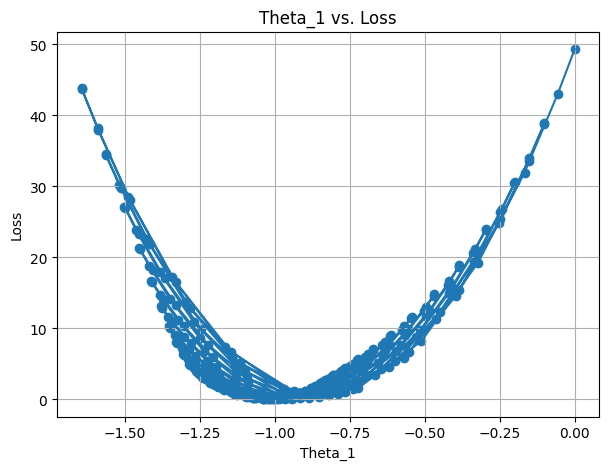

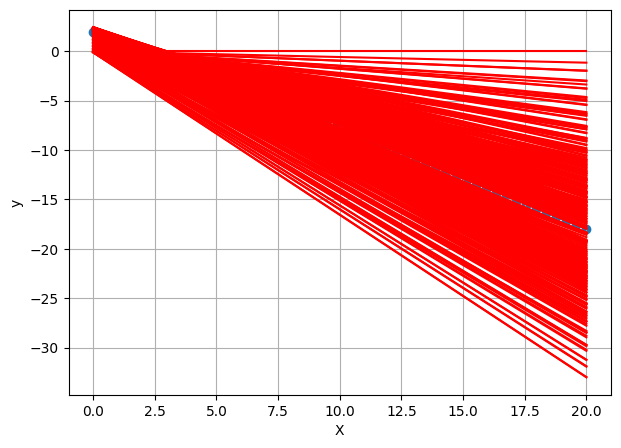

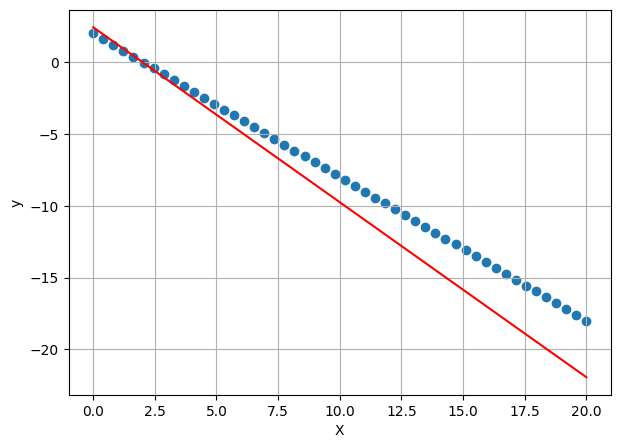

In [25]:
loss_vs_epochs(cost_valsm4)
theta0_vs_loss(theta_0_valsm4, cost_valsm4)
theta1_vs_loss(theta_1_valsm4, cost_valsm4)
plot_all_regressions(X, y, y_pred_valsm4)
plot_best_regression(X, y, y_predm4)

### Do not forget:

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero.
#### Try momentum = 0

### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b>
##### h_temp = theta0_temp + theta1_temp * X

In [26]:
def LR_NAGGD(X, y, learning_rate=0.001, max_iterations=1000, stop_criteria=0.001, cost_tolerance=0.001, gamma=0.9):
    theta_0 = 0
    theta_1 = 0
    m = len(y)
    v_0 = 0
    v_1 = 0

    theta_0_vals = []
    theta_1_vals = []
    cost_vals = []
    y_pred_vals = []

    for iteration in range(max_iterations):

        theta0_tmp = theta_0 - gamma * v_0
        theta1_tmp = theta_1 - gamma * v_1
        h_tmp = theta0_tmp + theta1_tmp * X

        Error_Vector_tmp = h_tmp - y

        d_theta_0_tmp = (1 / m) * np.sum(Error_Vector_tmp)
        d_theta_1_tmp = (1 / m) * np.sum(Error_Vector_tmp * X)

        Gradient_Vector_tmp = np.array([[d_theta_0_tmp], [d_theta_1_tmp]])
        Gradient_Vector_Norm_tmp = np.linalg.norm(Gradient_Vector_tmp)
        cost_tmp = (1 / (2 * m)) * np.sum(Error_Vector_tmp ** 2)

        y_pred = theta_0 + theta_1 * X

        #Error_Vector = y_pred - y
        #cost = (1 / (2 * m)) * np.sum(Error_Vector ** 2)
        #d_theta_0 = (1 / m) * np.sum(Error_Vector)
        #d_theta_1 = (1 / m) * np.sum(Error_Vector * X)
        #Gradient_Vector = np.array([d_theta_0, d_theta_1])
        #Gradient_Vector_Norm = np.linalg.norm(Gradient_Vector)

        theta_0_vals.append(theta_0)
        theta_1_vals.append(theta_1)
        cost_vals.append(cost_tmp)
        y_pred_vals.append(y_pred)

        print(f"\n****************** Iteration {iteration} ********************\n")
        print(f"h(x):\n{h_tmp}\n")
        print(f"Error Vector:\n{Error_Vector_tmp}\n")
        print(f"j = {cost_tmp:.6f}\n")
        print(f"Gradient Vector:\n{Gradient_Vector_tmp}\n")
        print(f"Gradient Vector Norm:\n{Gradient_Vector_Norm_tmp:.6f}\n")

        if iteration > 0:
            if (abs(cost_vals[-1] - cost_vals[-2]) < cost_tolerance) or ((Gradient_Vector_Norm_tmp < stop_criteria)):

                print("****************** Training Report ********************\n")
                print(f"Gradient Descent converged after {iteration+1} epochs\n")
                print(f"theta_0_Opt : {theta_0}")
                print(f"theta_1_Opt : {theta_1}\n")
                print(f"Error Vector:\n {Error_Vector_tmp}")
                print("\nCost =", cost_tmp, "\n")
                print(f"\nh(x) = y_predict: \n {y_pred}")
                print(f"\ny_actual : \n {y}\n")

                break

        v_0 = gamma * v_0 + learning_rate * d_theta_0_tmp
        v_1 = gamma * v_1 + learning_rate * d_theta_1_tmp
        theta_0 -= v_0
        theta_1 -= v_1

    print("\n****************** Training Report ********************\n")
    print(f"Gradient Descent converged after {iteration+1} epochs\n")
    print(f"theta_0_Opt : {theta_0}")
    print(f"theta_1_Opt : {theta_1}\n")
    print(f"Error Vector:\n{Error_Vector_tmp}\n")
    print(f"Cost = {cost_tmp:.6f}\n")
    print(f"h(x) = y_predict:\n{y_pred}\n")
    print(f"y_actual:\n{y}\n")

    return y_pred, cost_vals, theta_0_vals, theta_1_vals, y_pred_vals


##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [27]:
y_predNG1, cost_valsNG1, theta_0_valsNG1, theta_1_valsNG1, y_pred_valsNG1 = LR_NAGGD(X, y, learning_rate=0.0005, max_iterations=300, gamma = 0.9)


****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.346939

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.972543


****************** Iteration 1 ********************

h(x):
[

In [28]:
print(f"r2 score: {r2_score(y, y_predNG1)}")

r2 score: 0.9710487203543167


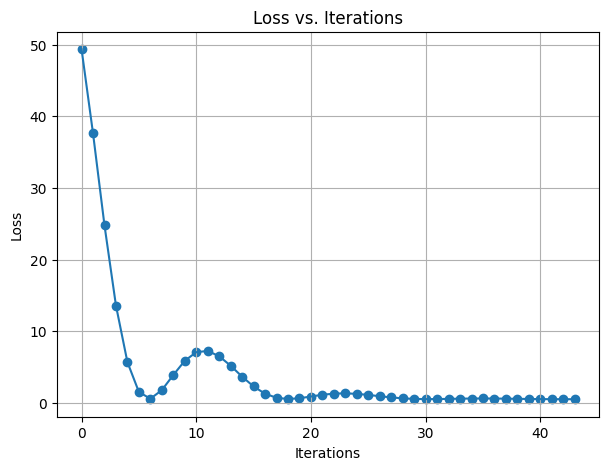

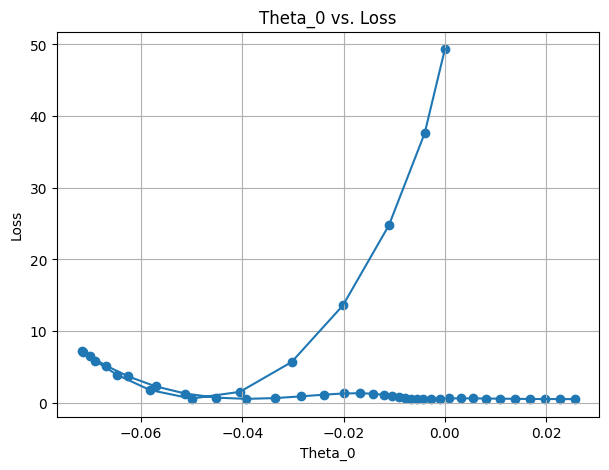

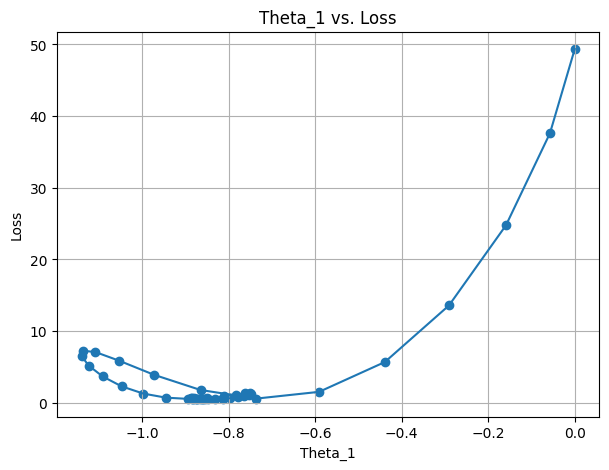

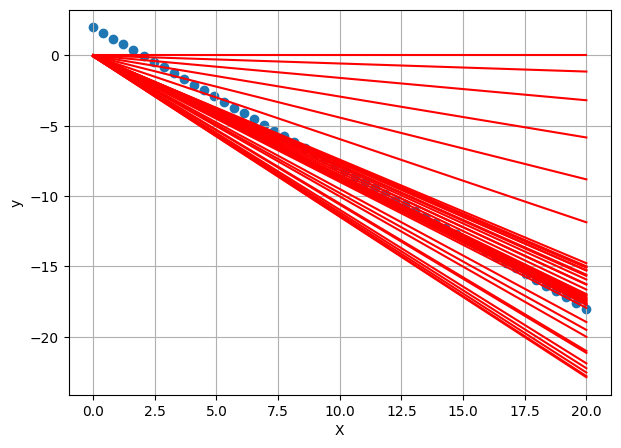

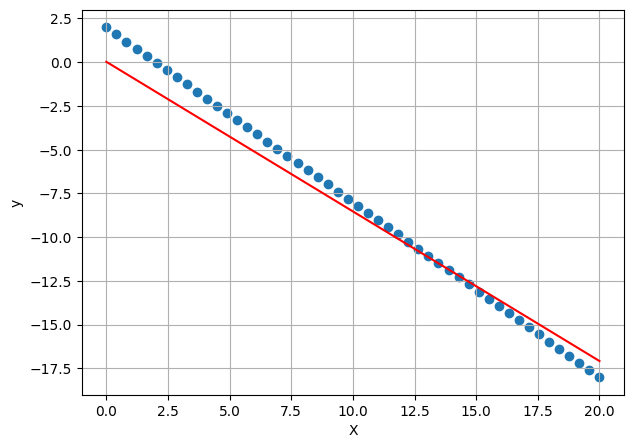

In [29]:
loss_vs_epochs(cost_valsNG1)
theta0_vs_loss(theta_0_valsNG1, cost_valsNG1)
theta1_vs_loss(theta_1_valsNG1, cost_valsNG1)
plot_all_regressions(X, y, y_pred_valsNG1)
plot_best_regression(X, y, y_predNG1)

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [30]:
y_predNG2, cost_valsNG2, theta_0_valsNG2, theta_1_valsNG2, y_pred_valsNG2 = LR_NAGGD(X, y, learning_rate=0.0005, max_iterations=300, gamma = 0.89)


****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.346939

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.972543


****************** Iteration 1 ********************

h(x):
[

In [31]:
print(f"r2 score: {r2_score(y, y_predNG2)}")

r2 score: 0.9699608922127444


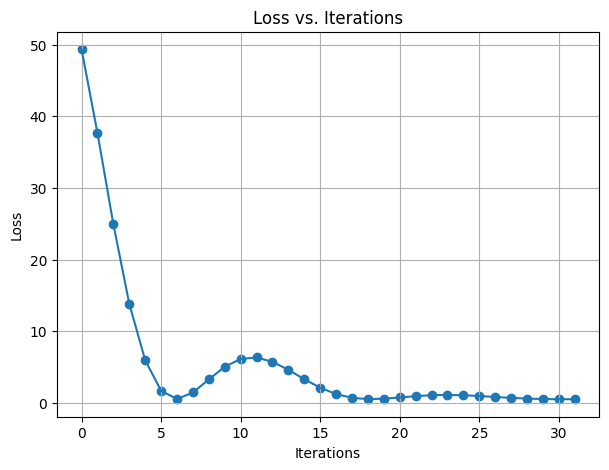

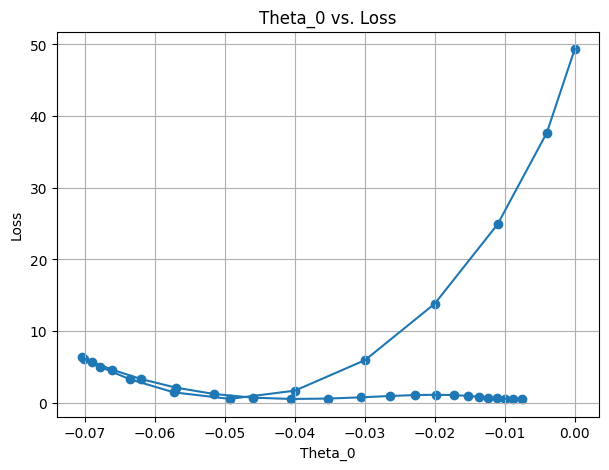

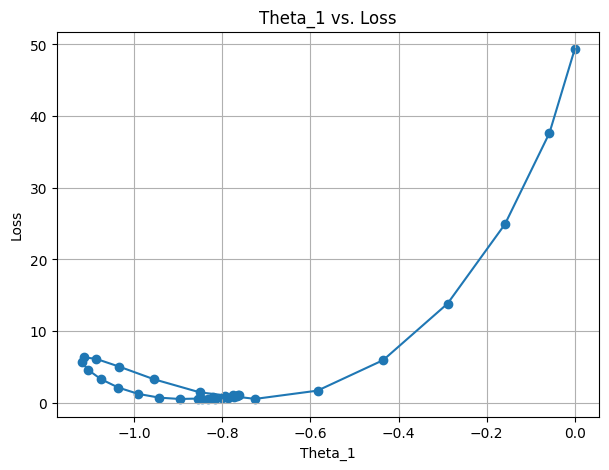

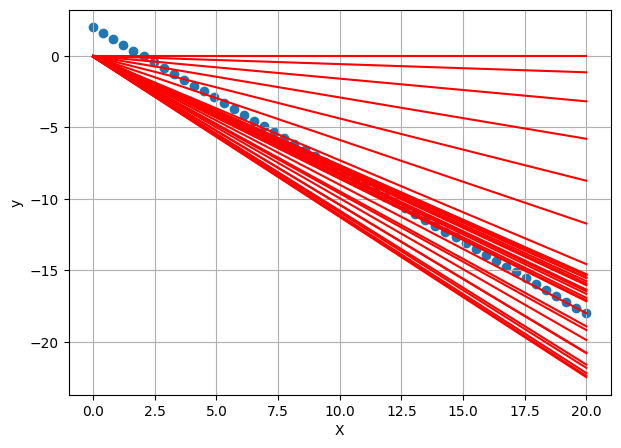

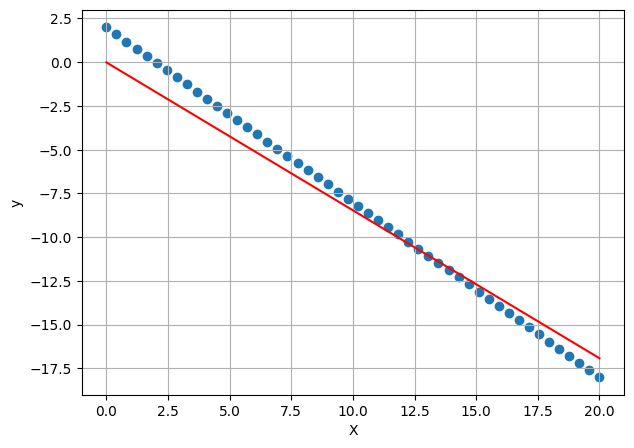

In [32]:
loss_vs_epochs(cost_valsNG2)
theta0_vs_loss(theta_0_valsNG2, cost_valsNG2)
theta1_vs_loss(theta_1_valsNG2, cost_valsNG2)
plot_all_regressions(X, y, y_pred_valsNG2)
plot_best_regression(X, y, y_predNG2)